# Carga de datos

🔹 DESCARGAR EL PROYECTO (PRIMERA VEZ)

Como tienes permisos, lo mejor es clonar el repositorio en tu ordenador.

1️⃣ Abre la terminal y ve a la carpeta donde quieres descargar el proyecto

cd ruta/donde/quieres/guardar
Ejemplo:

cd ~/Documents
2️⃣ Clona el repositorio de GitHub

git clone https://github.com/OmarDekGil/Proyecto_ML.git
3️⃣ Entra en la carpeta del proyecto

cd Proyecto_ML
4️⃣ Verifica que tienes acceso y que todo está bien

git remote -v
Si ves la URL de GitHub tanto para fetch como push, todo está correcto.


🔹 CÓMO SUBIR CAMBIOS

Una vez que hayas modificado o agregado archivos, sigue estos pasos:

1️⃣ Ver qué ha cambiado

git status
2️⃣ Añadir los archivos modificados
Si quieres añadir todos los cambios:

git add .
Si solo quieres añadir un archivo específico:

git add nombre_del_archivo
3️⃣ Guardar los cambios con un commit

git commit -m "Descripción breve de los cambios"
4️⃣ Subir los cambios a GitHub

git push origin main

🔹 CÓMO ACTUALIZAR TU PROYECTO SI TU AMIGO SUBE CAMBIOS

Si tu amigo sube cambios al repositorio y quieres tener la última versión antes de modificar algo:

1️⃣ Asegúrate de estar en la carpeta del proyecto

cd Proyecto_ML
2️⃣ Descarga la última versión del repositorio

git pull origin main
Esto actualizará tu copia local con los cambios que hizo tu amigo.





In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv("Datasets/movies_metadata.csv")


data = data[['adult','production_companies', 'genres', 'runtime', 'vote_average', 'vote_count', 'popularity', 'budget', 'revenue']]
data


Matplotlib is building the font cache; this may take a moment.
/var/folders/3v/pvqv7b3n30x2853fxg80ybpm0000gn/T/ipykernel_8465/2744336796.py:4: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("Datasets/movies_metadata.csv")


,adult,production_companies,genres,runtime,vote_average,vote_count,popularity,budget,revenue
0,False,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",81.0,7.7,5415.0,21.946943,30000000,373554033.0
1,False,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",104.0,6.9,2413.0,17.015539,65000000,262797249.0
2,False,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",101.0,6.5,92.0,11.7129,0,0.0
3,False,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",127.0,6.1,34.0,3.859495,16000000,81452156.0
4,False,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'id': 35, 'name': 'Comedy'}]",106.0,5.7,173.0,8.387519,0,76578911.0
...,...,...,...,...,...,...,...,...,...
45461,False,[],"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...",90.0,4.0,1.0,0.072051,0,0.0
45462,False,"[{'name': 'Sine Olivia', 'id': 19653}]","[{'id': 18, 'name': 'Drama'}]",360.0,9.0,3.0,0.178241,0,0.0
45463,False,"[{'name': 'American World Pictures', 'id': 6165}]","[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",90.0,3.8,6.0,0.903007,0,0.0
45464,False,"[{'name': 'Yermoliev', 'id': 88753}]",[],87.0,0.0,0.0,0.003503,0,0.0


# Limpieza de datos

**Gestión datos faltantes**

In [ ]:
data = data.dropna()
nan= data.isnull().sum(axis=0)
print(nan)

adult                   0
production_companies    0
genres                  0
runtime                 0
vote_average            0
vote_count              0
popularity              0
budget                  0
revenue                 0
dtype: int64


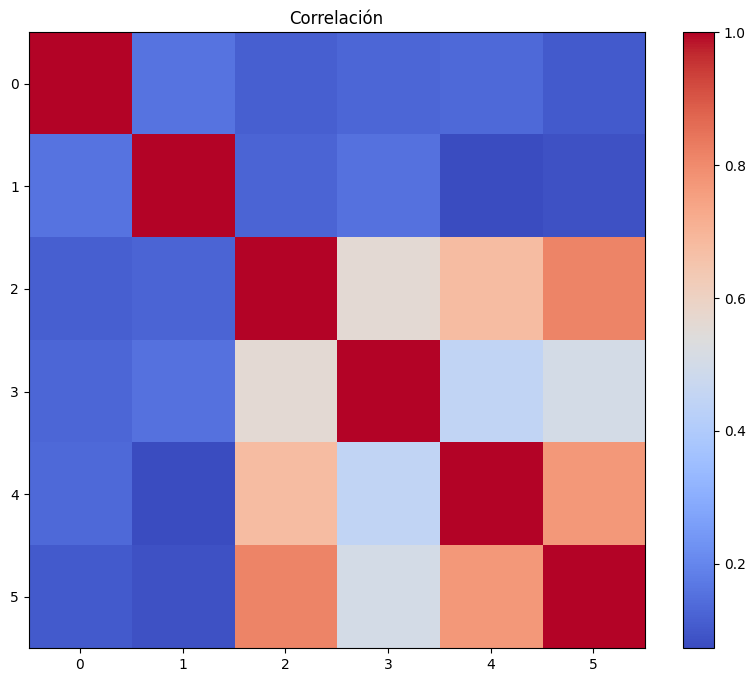

In [3]:
# Calcular la matriz de correlación
corr = data[['runtime', 'vote_average', 'vote_count', 'popularity', 'budget', 'revenue']].corr()

# Mostrar la matriz de correlación
corr



plt.figure(figsize=(10,8))
plt.imshow(corr, cmap='coolwarm', interpolation='nearest')
plt.title('Correlación')
plt.colorbar()
plt.show()


**Gestión de outliers**

In [5]:
# Convertir las columnas a numéricas, forzando los errores a NaN
data[numerical_columns] = data[numerical_columns].apply(pd.to_numeric, errors='coerce')

# Verificar si hay valores NaN
print(data[numerical_columns].isnull().sum())



runtime         0
vote_average    0
vote_count      0
popularity      0
budget          0
revenue         0
dtype: int64


/var/folders/3v/pvqv7b3n30x2853fxg80ybpm0000gn/T/ipykernel_8465/285736555.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[numerical_columns] = data[numerical_columns].apply(pd.to_numeric, errors='coerce')


In [6]:
# Eliminar filas con valores NaN
data_clean = data.dropna(subset=numerical_columns)

# O, si prefieres, llenar los NaN con la mediana
data_clean = data[numerical_columns].fillna(data[numerical_columns].median())


In [7]:
from scipy.stats import zscore

# Calcular el Z-score para cada columna después de limpiar los datos
z_scores = np.abs(zscore(data_clean))

# Filtrar outliers (Z-score > 3)
outliers_zscore = (z_scores > 3).all(axis=1)

# Mostrar los valores atípicos
outliers_data_zscore = data_clean[outliers_zscore]
print("Outliers detectados con Z-score:\n", outliers_data_zscore)


Outliers detectados con Z-score:
 Empty DataFrame
Columns: [runtime, vote_average, vote_count, popularity, budget, revenue]
Index: []


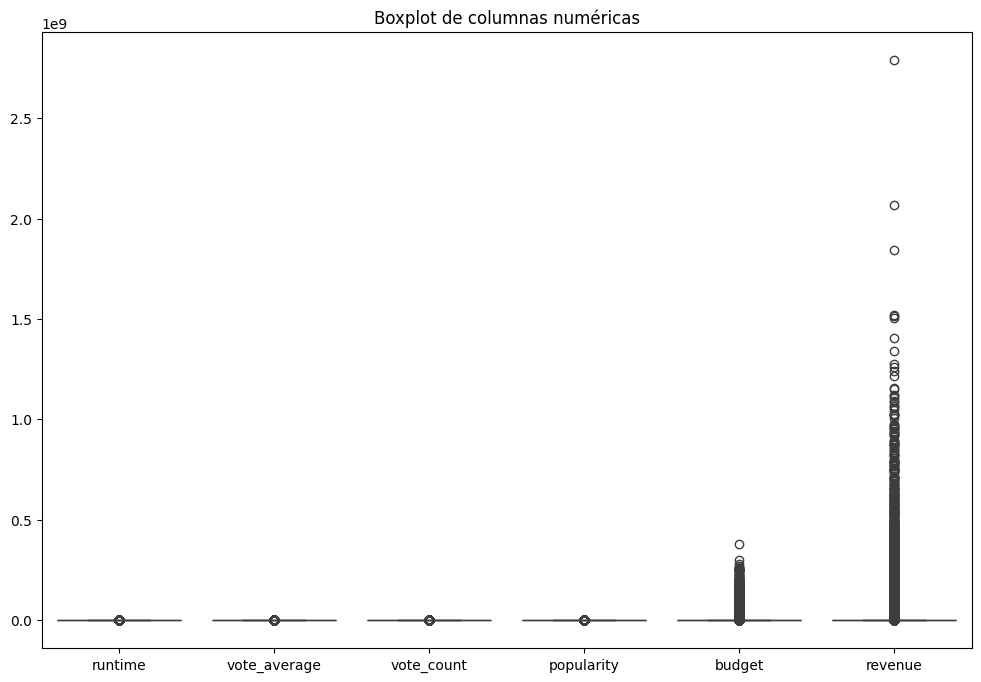

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear boxplot para cada columna numérica
plt.figure(figsize=(12, 8))
sns.boxplot(data=data_clean)
plt.title("Boxplot de columnas numéricas")
plt.show()


In [9]:
# Calcular Q1 y Q3
Q1 = data_clean.quantile(0.25)
Q3 = data_clean.quantile(0.75)
IQR = Q3 - Q1

# Definir los límites para detectar outliers
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Filtrar los outliers
outliers_iqr = (data_clean < limite_inferior) | (data_clean > limite_superior)

# Mostrar los valores atípicos
outliers_data_iqr = data_clean[outliers_iqr.any(axis=1)]
print("Outliers detectados con IQR:\n", outliers_data_iqr)


Outliers detectados con IQR:
        runtime  vote_average  vote_count  popularity    budget      revenue
0         81.0           7.7      5415.0   21.946943  30000000  373554033.0
1        104.0           6.9      2413.0   17.015539  65000000  262797249.0
2        101.0           6.5        92.0   11.712900         0          0.0
3        127.0           6.1        34.0    3.859495  16000000   81452156.0
4        106.0           5.7       173.0    8.387519         0   76578911.0
...        ...           ...         ...         ...       ...          ...
45457     45.0           7.0         2.0    0.076061         0          0.0
45458     30.0           7.0         1.0    0.386450         0          0.0
45462    360.0           9.0         3.0    0.178241         0          0.0
45464     87.0           0.0         0.0    0.003503         0          0.0
45465     75.0           0.0         0.0    0.163015         0          0.0

[19880 rows x 6 columns]


In [10]:
# Eliminar filas con outliers
data_sin_outliers = data_clean[~outliers_zscore]  # o usa outliers_iqr dependiendo del método
print("Datos sin outliers:\n", data_sin_outliers.head())


Datos sin outliers:
    runtime  vote_average  vote_count  popularity    budget      revenue
0     81.0           7.7      5415.0   21.946943  30000000  373554033.0
1    104.0           6.9      2413.0   17.015539  65000000  262797249.0
2    101.0           6.5        92.0   11.712900         0          0.0
3    127.0           6.1        34.0    3.859495  16000000   81452156.0
4    106.0           5.7       173.0    8.387519         0   76578911.0
